# Homework 2
Computational and Differential Geometry 

Student: Manuela Acosta Fajardo

## Index

1. [Point 1](#p1)
2. [Point 2](#p2)
3. [Point 3](#p3)
4. [Point 4](#p4)
5. [References](#ref)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Point 1 <a class="anchor" id="p1">


The purpose of this point is to write down a code able to read the data attached, and to create a doubly-connected edge list for the simple polygon given. 

### Definition of the algorithm 
    
In order to create the algorithm that returns the DCEL of the polygon, three classes are created: 

#### Class Vertex: 

This class creates the objects that store the information of each vertex of the polygon. The attributes of this objects are: 
- *x*: Indicates the x-coordinate of the vertex. 
    
- *y*: Indicates the y-coordinate of the vertex. 
    
- *edges*: Is a list that stores the indicent edges on the vertex. 
    
- *type*: Indicates the type of the vertex, wheter is a start, end, merge, split or regular vertex. 
    
- *label*: Indicates the label (or position) of the vertex, once all the vertices are sorted in counterclockwise order.
    
- *color*: Indicates the color of the vertex, for the 3-coloring polygon. 
    
It is important to clarify that some of this attributes are created for later points, and are not going to be used yet. On the other hand, this class has the following function: 
- `sort_half_edges`: This function sorts the half-edges of each vertex, according to the angle they form with respect of the x-axis. 

#### Class HalfEdge:

This class creates the objects that represent the half-edges of the polygon. The attributes if this class are: 
- *origin*: Indicates the vertex where the half-edge is originated. 

- *prev*: Indicates the previous half-edge on the polygon. 

- *next*: Indicates the next half-edge on the polygon. 

- *twin*: Indicates the twin half-edge, that is, if the half_edge is $v_1v_2$, its twin is $v_2v_1$. 

- *face*: Indicates the indicent face on the half-edge. 

- *angle*: Indicates the angle that the edge forms with the x-axis. 

- *segment*: Is a list of the two end-points of the half-edge. 

- *intersection*: Indicates the intersection point of the half-edge with the sweep-line. 

- *helper*: Indicates the helper vertex of the half-edge.

#### Class Face: 

This class creates the objects that represent the faces of the polygon. The attributes of this objects are: 
- *incident_edge*: Indicates the half_edge that is incident on the face. 

- *name*: Indicates the name of the face.

In [2]:
class Vertex:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.edges = [] # List of incident edges on the vertex
        self.type = None
        self.label = None
        self.color = None
        
    def sort_half_edges(self):
        # Organizes the half-edges of each vertex according to the angle
        self.edges.sort(key=lambda x:x.angle, reverse=True)
    
    def __eq__(self, other):
        if isinstance(other, Vertex):
            return self.x == other.x and self.y == other.y
        return NotImplemented
        
    def __repr__(self):
        return '({0},{1})'.format(self.x, self.y)
    

class HalfEdge:
    def __init__(self, v1, v2):
        self.origin = v1
        self.prev = None
        self.next = None
        self.twin = None
        self.face = None
        self.angle = angle(v2.x - v1.x, v2.y - v1.y)
        self.segment = None
        self.intersection = None
        self.helper = None
    
    def __repr__(self):
        if self.next is None:
            return '({0},{1}) -> ()'.format(self.origin.x, self.origin.y)
        else:
            return '({0},{1}) -> ({2},{3})'.format(self.origin.x, self.origin.y, self.next.origin.x, self.next.origin.y)
        
        
class Face:
    def __init__(self):
        self.incident_edge = None
        self.name = None

Now that the classes are established, it is possible to define the following functions, so that the DCEL can be created:
- `find_vertex`: This function receives the list of vertices, the x and y coordinate of the vertex that is wanted to be found, and returns the vertex object that corresponds to this coordinates. 
- `angle`: This function returns the angle between the segment with coordinates x and y, and the x axis.
- `read_data`: This function reads the data file, cleans it, and returns the list of points stored in this data file. 
- `create_segments`: This function receives a list of points, and returns the list of segments formed by this points.
- `draw_segments`: This function plots the segments.

Using this additional functions defined before, the function `dcel` is created. It receives the list of points and the list of segments of a simple polygon, and returns the Doubly-Connected Edge List of this polygon. In the first place, the empty lists *vertices*, *half_edges* and *faces* are created to store the information. Then, for all the points in the list, the vertex object is found, and added to the corresponding list of vertices. After that, a half-edge object is created for each segment in the list, and its attributes origin, twin and segment are defined. Besides, this half-edge is stored in the origin vertex list of edges. 

Then, once all the half-edges are defined, the edges of each vertex are sorted by their angle, and then the next and previous half-edge is defined. After that, the faces are defined doing a cicle with the next half-edge of each edge. As this process is completed, the three lists are returned, with the information corresponding to the DCEL of the polygon.

In [3]:
def find_vertex(vertices, x, y):
    # Finds the vertex object in the vertices list, given the x and y coordinates 
    for v in vertices:
        if v.x == x and v.y == y:
            return v
    return None

def angle(px, py):
    # Returns the angle between the segment with coordinates x and y, and the x axis
    h = np.sqrt(px**2 + py**2)
    if py > 0:
        return np.arccos(px / h)
    else:
        return 2*np.pi - np.arccos(px / h)

def read_data(file):
    # Reads the data file and returns the list of points 
    with open(file) as f:
        read = f.read()
    read = read.split(', (')
    characters = "'()"
    points1 = []
    for r in read:
        for x in range(len(characters)):
            r = r.replace(characters[x], "")
        points1.append(r)
    points1.pop() # Deleting the last point, which is the same as the first, to avoid inconveniences with the code 
    points = []
    for p in points1:
        point = p.split(', ')
        points.append([float(point[0]), float(point[1])])
    return points

def create_segments(points):
    # Creates the list of segments given the list of points 
    segments = []
    for i in range(len(points)-1):
        segments.append([points[i], points[i+1]])
    segments.append([points[len(points)-1], points[0]])
    return segments

def draw_segments(segments, color):
    # Plots the segments
    for i in range(len(segments)):
        plt.plot([segments[i][0][0], segments[i][1][0]], [segments[i][0][1], segments[i][1][1]], c=color)

def dcel(points, segments):
    # Returns the Doubly Connected Edge List (DCEL)
    
    # Creating empty lists to store the information 
    vertices = []
    half_edges = []
    faces = []
    
    # Creating the objects Vertex for every point in the list 'points'
    for p in points:
        vertices.append(Vertex(p[0], p[1]))
    
    # Creating the two half-edges corresponding to each segment
    for s in segments: 
        start = s[0]
        end = s[1]
        
        # Finding the object Vertex for each end-point of the segment
        v1 = find_vertex(vertices, start[0], start[1])
        v2 = find_vertex(vertices, end[0], end[1])
        
        # Creating the objects HalfEdge for each half-edge of the segment
        h1 = HalfEdge(v1, v2)
        h2 = HalfEdge(v2, v1)
        
        # Defining the twin of each half-edge
        h1.twin = h2
        h2.twin = h1
        h1.segment = [v1, v2]
        h2.segment = [v1, v2]
        
        # Adding the half-edges to the corresponding lists
        v1.edges.append(h1)
        v2.edges.append(h2)
        half_edges.append(h1)
        half_edges.append(h2)
    
    # Defining the next and previous half-edges of each vertex 
    for v in vertices:
        # Organizing the half-eadges of each vertex by the angle
        v.sort_half_edges()
        
        num_half_edges = len(v.edges)
        
        if num_half_edges < 2:
            return Exception('There should be at least two half edges for a vertex')
        
        for i in range(num_half_edges - 1):
            e1 = v.edges[i]
            e2 = v.edges[i+1]
            e1.twin.next = e2
            e2.prev = e1.twin
        e1 = v.edges[num_half_edges - 1]
        e2 = v.edges[0]
        e1.twin.next = e2
        e2.prev = e1.twin
    
    # Creating the faces 
    faces_count = 0
    for e in half_edges:
        if e.face == None:
            faces_count += 1
            f = Face()
            f.name = 'f' + str(faces_count)
            f.incident_edge = e
            e.face = f
            e_copy = e
            while (not e_copy.next == e):
                e_copy.face = f
                e_copy = e_copy.next 
            e_copy.face = f
            
            faces.append(f)
            
    return vertices, half_edges, faces

### Implementation of the algorithm

Lets implement the functions defined before with the data file given. For that matter, the data file is readed first. Then, the list of segments is created and plotted. Finally, the DCEL of the polygon is created. 

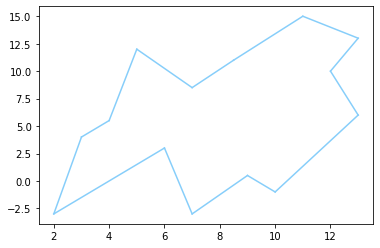

In [4]:
points = read_data('datos.txt')
segments = create_segments(points)
draw_segments(segments, 'lightskyblue')
D = dcel(points,segments)

## Point 2 <a class="anchor" id="p2">

This point aims to implement an algorithm able to split the given polygon in to y-monotone polygons. The answer will be given in terms of doubly-connected edge lists, and the results are going to be plotted.
    
    
### Definition of the algorithm

In order to create the algorithm that splits the given polygon into y-monotone polygons, the following functions are defined: 
- `angle2`: This function returns the angle between the two segments $v_1v_2$ and $v_1v_3$, given the three vertex $v_1$, $v_2$ and $v_3$. 
- `vertex_type`: This function sets the type of each vertex according to the y-coordinate of its neighbors and the internal angle of the vertex. 
- `plot_vertex_type`: This function plots the segments and the vertices with the corresponding figure according to the type of each vertex. In this case, the start vertices are plotted as stars. 
- `sort_vertices`: This function organizes the vertices in couterclockwise direction, and labels them according to this order. The first vertex is chosen as the vertex with higher y-coordinate. This function also returns a list of organized edges, where each edge $v_iv_{i+1}$ corresponds to the vertex $v_i$ and the next one $v_{i+1}$.
- `intersect`: This function checks if two segments $p_1p_2$ and $p_3p_4$ intersect, and, in case they do, returns the intersection point.
- `sl_intersection`: This function returns the intersection of each active segment (segment intersected by the sweep-line) with the sweep-line (horizontal line).
- `create_diagonal`: This function creates the half-edge object for the diagonal between the two given vertices. It also adds this diagonal to the corresponding list of half-edges, and adds the half-edges to the incident vertices.  
- `find_ej_sl`: This function finds the edge $e_j$ directly at the left of the vertex $v$ on the sweep-line. 
- `helper`:  This function defines the helper of the given vertex. 
- `defining_next`: This function defines the attributes next and previous of the new half edges included on the DCEL. 
- `defining_faces`: This function defines the new faces created by dividing the polygon in y-monotone pieces. 
- `create_monotone_polygon`: This function creates a DCEL for each sub-polygon resulting on the algorithm that splits the polygon. 
- `plot_polygon`: This function plots the y-monotone polygon. 

In [5]:
def angle2(v1, v2, v3):
    det = ((v2.x - v1.x)*(v3.y - v1.y)) - ((v3.x - v1.x)*(v2.y - v1.y))
    den = (v2.x - v1.x)*(v3.x-v1.x) + (v2.y - v1.y)*(v3.y - v1.y)
    ang = np.arctan(det/den)
    if det < 0:  #det<0
        return ang
    else:
        return 2*np.pi - ang

def vertex_type(half_edges):
    for he in half_edges:
        if he.face.name == 'f2':
            v = he.origin # Vertex
            v1 = he.prev.origin # Neighbor 1
            v2 = he.next.origin # Neighbor 2
            angle = angle2(v, v1, v2) # TENGO QUE MIRAR QUE SEA EL ÁNGULO INTERNO
            if (v1.y < v.y) and (v2.y < v.y) and (angle < np.pi):
                v.type = 'start'
            elif (v1.y > v.y) and (v2.y > v.y) and (angle < np.pi):
                v.type = 'end'
            elif (v1.y < v.y) and (v2.y < v.y) and (angle > np.pi):
                v.type = 'split'
            elif (v1.y > v.y) and (v2.y > v.y) and (angle > np.pi):
                v.type = 'merge'
            elif ((v1.y > v.y) and (v2.y < v.y)) or ((v1.y < v.y) and (v2.y > v.y)):
                v.type = 'regular'

def plot_vertex_type(vertices, segments, color):
    draw_segments(segments, color)
    for v in vertices:
        if v.type == 'start':
            plt.scatter(v.x, v.y, c=color, marker='*')
        elif v.type == 'end':
            plt.scatter(v.x, v.y, c=color, marker='s')
        elif v.type == 'split':
            plt.scatter(v.x, v.y, c=color, marker='^')
        elif v.type == 'merge':
            plt.scatter(v.x, v.y, c=color, marker='v')
        elif v.type == 'regular':
            plt.scatter(v.x, v.y, c=color, marker='o')
            
def sort_vertices(vertices):
    # Organizes the vertices in couterclockwise direction, and labels them according to this order
    # Also returns a list of organized edges, where each edge corresponds to the vertex (vi) and the next one (vi+1)
    
    # Choosing the first (or start) vertex
    y_coords = []
    for v in vertices:
        y_coords.append(v.y)
    max_coord = max(y_coords)
    for v in vertices:
        if v.y == max_coord:
            start = v
            
    # Labeling the vertices
    edges = []
    e = start.edges[1]
    e_copy = e
    count = 0
    while (not e_copy.next == e):
        count += 1
        e_copy.origin.label = count
        edges.append(e_copy)
        e_copy = e_copy.next
    e_copy.origin.label = count+1
    edges.append(e_copy)

    vertices.sort(key=lambda v:v.label)
    return edges

def intersect(p1,p2,p3,p4):
    # Checks if two segments p1p2 and p3p4 intersect, and, in case they do, indicates the intersection point 
    d = (p4[1]-p3[1])*(p2[0]-p1[0]) - (p4[0]-p3[0])*(p2[1]-p1[1])
    if d == 0: # Segments are parallel 
        return None
    ua = ((p4[0]-p3[0])*(p1[1]-p3[1]) - (p4[1]-p3[1])*(p1[0]-p3[0])) / d
    if ua < 0 or ua > 1: # Out of range
        return None
    ub = ((p2[0]-p1[0])*(p1[1]-p3[1]) - (p2[1]-p1[1])*(p1[0]-p3[0])) / d
    if ub < 0 or ub > 1: # Out of range
        return None
    x = p1[0] + ua * (p2[0]-p1[0])
    y = p1[1] + ua * (p2[1]-p1[1])
    return [x, y]

def sl_intersection(T, v):
    # Returns the intersection of each active segment with the sweep-line 
    # Creating the horizontal sweep-line according to each point p
    p1 = [-10, v.y]
    p2 = [20, v.y]
    for e in T: # Every segment intersected by the sweep-line
        p3 = [e.segment[0].x, e.segment[0].y]
        p4 = [e.segment[1].x, e.segment[1].y]
        point = intersect(p1,p2,p3,p4)
        e.intersection = point

def create_diagonal(v1, v2):
    h1 = HalfEdge(v1, v2)
    h2 = HalfEdge(v2, v1)
    h1.twin = h2
    h2.twin = h1
    h1.segment = [v1, v2]
    h2.segment = [v1, v2]
    v1.edges.append(h1)
    v2.edges.append(h2)
    return h1, h2

def find_ej_sl(v, T):
    left = []
    for e in T:
        if e.intersection[0] < v.x:
            left.append(e)
    ej = left[len(left)-1]
    return ej

def helper(v, T, D):
    # Defining ej and ek 
    if (v.type == 'split') or (v.type == 'merge'):
        left = []
        right = []
        for e in T:
            if e.intersection[0] < v.x:
                left.append(e)
            elif e.intersection[0] > v.x:
                right.append(e)
        ej = left[len(left)-1]
        if len(right) > 0:
            ek = right[0]
    elif v.type == 'regular':
        for e in T:
            if (v.x == e.intersection[0]) or (v.x == e.intersection[1]):
                aux_edge = e
        idx = T.index(aux_edge)
        if idx == 0:
            ej = None
            ek = None
        elif idx == len(T)-1:
            ej = T[len(T)-2]
            ek = T[len(T)-1]
        else:
            ej = T[idx-1]
            ek = None
            ej.helper = ej.twin.origin
    else:
        ej = None
        ek = None
        
    # Defining the helper(ej)
    if ej != None and ek != None:
        upper_points = [] # List of points with higher y-coordinates than the event vertex v
        for vertex in D[0]:
            if vertex.y > v.y:
                upper_points.append(vertex)
        upper_points.sort(key=lambda v:v.y)
        min_point = upper_points[0]
        if (min_point.x >= ej.intersection[0]) and (min_point.x <= ek.intersection[0]):
            ej.helper = min_point

def defining_next(D):
    for v in D[0]:
        # Organizing the half-eadges of each vertex by the angle
        v.sort_half_edges()

        num_half_edges = len(v.edges)

        if num_half_edges < 2:
            return Exception('There should be at least two half edges for a vertex')

        for i in range(num_half_edges - 1):
            e1 = v.edges[i]
            e2 = v.edges[i+1]
            e1.twin.next = e2
            e2.prev = e1.twin
        e1 = v.edges[num_half_edges - 1]
        e2 = v.edges[0]
        e1.twin.next = e2
        e2.prev = e1.twin

def defining_faces(D):
    faces_count = 1
    while len(D[2]) > 1:
        D[2].pop()
    for e in D[1]:
        if e.face == None:
            faces_count += 1
            f = Face()
            f.name = 'f' + str(faces_count)
            f.incident_edge = e
            e.face = f
            e_copy = e
            while (not e_copy.next == e):
                e_copy.face = f
                e_copy = e_copy.next 
            e_copy.face = f
            
            D[2].append(f)

def create_monotone_polygon(face_name, D):
    P = [[], [], []]
    for edge in D[1]:
        if edge.face.name == face_name:
            P[0].append(edge.origin)
            P[1].append(edge)
            P[1].append(edge.twin)
            if edge.face not in P[2]:
                P[2].append(edge.face)
    return P 

def plot_polygon(D, color):
    new_edges = []
    for edge in D[1]:
        edge.segment.sort(key=lambda p:p.y, reverse=True)
        if edge.segment not in new_edges:
            new_edges.append(edge.segment)

    segments = []
    for edge in new_edges:
        segments.append([[edge[0].x, edge[0].y], [edge[1].x, edge[1].y]])
    draw_segments(segments, color)

Now, in order to divide the simple polygon into y-monotone pieces, a subroutine is created for each type of vertex, so that diagonals are created according to each case. Therefore, the subroutines are: `handle_start_vertex`, `handle_end_vertex`, `handle_split_vertex`, `handle_merge_vertex` and `handle_regular_vertex`. 

Once this subroutines are created, the function `handle_vertex` is defined. This function receives the vertex that needs to be handled $v$, the list with the active segments on the sweep-line $T$, the DCEL of the polygon $D$ and the list of sorted edges of the polygon. In the first place, the status of the sweep-line is updated, checking if the vertex is a start-point of a segment, in that case it adds this edge to the sweep-line, or if it is an end-point of a segment, so that this edge is deleted of the sweep-line, as it is no longer active. Then, the helpers of the edges on the sweep-line are defined, and after that, the vertex is handled according to its type, with the subroutines defined. 

All the vertex are handled, and, after that, the attributes next and previous of the new half-edges added are defined, as well as the new faces created. 

In [6]:
def handle_start_vertex(v, T, D, edges):
    i = v.label 
    ei = edges[i-1]
    ei.helper = v

def handle_end_vertex(v, T, D, edges):
    i = v.label
    ei_1 = edges[i-2]
    if ei_1.helper.type == 'merge':
        h1, h2 = create_diagonal(v, ei_1.helper) 
        D[1].append(h1)
        D[1].append(h2)
        
def handle_split_vertex(v, T, D, edges):
    ej = find_ej_sl(v, T)
    
    h1, h2 = create_diagonal(v, ej.helper)
    D[1].append(h1)
    D[1].append(h2)

    ej.helper = v
    
    ei = edges[v.label-1]
    ei.helper = v

def handle_merge_vertex(v, T, D, edges):
    i = v.label
    ei_1 = edges[i-2]
    if ei_1.helper.type == 'merge':
        h1, h2 = create_diagonal(v, ei_1.helper)
        D[1].append(h1)
        D[1].append(h2)
        
    ej = find_ej_sl(v, T)
    if ej.helper.type == 'merge':
        h1, h2 = create_diagonal(v, ej.helper)
        D[1].append(h1)
        D[1].append(h2)
    
    ej.helper = v

def handle_regular_vertex(v, T, D, edges):
    if v.x == T[0].intersection[0]:
        i = v.label
        ei_1 = edges[i-2]
        if ei_1.helper.type == 'merge':
            h1, h2 = create_diagonal(v, ei_1.helper)
            D[1].append(h1)
            D[1].append(h2)
                
        ei = edges[v.label-1]
        ei.helper = v
        
    else:
        ej = find_ej_sl(v, T)
        if ej.helper.type == 'merge':
            h1, h2 = create_diagonal(v, ej.helper)
            D[1].append(h1)
            D[1].append(h2)

        ej.helper = v
        
def handle_vertex(v, T, D, edges):

    # Updating the sweep-line status 
    for edge in edges:
        if v == edge.segment[0]:
            T.append(edge)
        elif v == edge.segment[1]:
            T.remove(edge)
    sl_intersection(T,v)
    T.sort(key=lambda e:[e.intersection[0], e.origin.x])
    
    # Updating the helper of the edge vj corresponding to the vertex v
    helper(v, T, D)
    
    if v.type == 'start':
        handle_start_vertex(v, T, D, edges)
    elif v.type == 'end':
        handle_end_vertex(v, T, D, edges)
    elif v.type == 'split':
        handle_split_vertex(v, T, D, edges)
    elif v.type == 'merge':
        handle_merge_vertex(v, T, D, edges)
    elif v.type == 'regular':
        handle_regular_vertex(v, T, D, edges)
        
def make_monotone(D):
    vertex_type(D[1])
    edges = sort_vertices(D[0]) # Organizing the vertices in counterclockwise direction, and creating the list of organized edges 
    for edge in edges:
        edge.segment.sort(key=lambda p:p.y, reverse=True)
    
    T = []
    Q = []
    for v in D[0]:
        Q.append(v)
    Q.sort(key=lambda v:[v.y, v.x], reverse=True)
    
    while len(Q)>0:
        v = Q.pop(0)
        handle_vertex(v, T, D, edges)
    
    defining_next(D) # Defining the next and previous half-edge for the new diagonals added 
    defining_faces(D)

### Implementation of the algorithm 

First, lets see the vertex type of each vertex on the polygon.

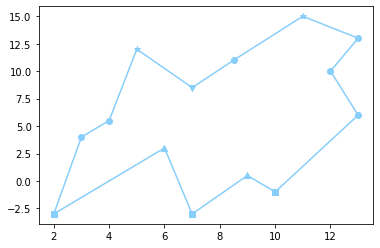

In [7]:
vertices, half_edges, faces = D 
vertex_type(half_edges)
plot_vertex_type(vertices, segments, 'lightskyblue')

Now, lets implement the algorithm with the polygon defined before. The results of the algorithm are given in terms of the DCEL created before. 

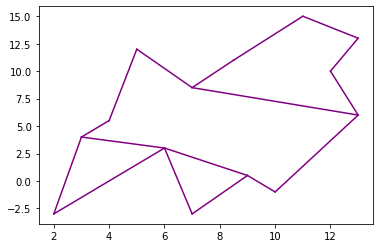

In [8]:
D_monotone = D
make_monotone(D_monotone)
plot_polygon(D_monotone, 'purple')

Lets create a sub-polygon DCEL list for each y-monotone polygon resulting. 

In [9]:
# Creating the monotone polygons resulting 
D2 = create_monotone_polygon('f2', D_monotone)
D3 = create_monotone_polygon('f3', D_monotone)
D4 = create_monotone_polygon('f4', D_monotone)
D5 = create_monotone_polygon('f5', D_monotone)
monotone_polygons = [D2, D3, D4, D5]

We can visualize each y-monotone polygon.

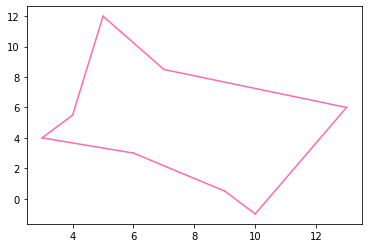

In [10]:
plot_polygon(D2, 'hotpink')

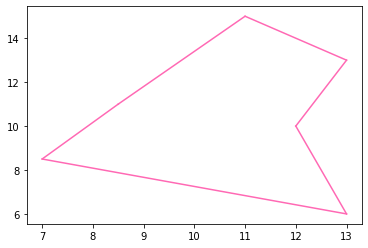

In [11]:
plot_polygon(D3, 'hotpink')

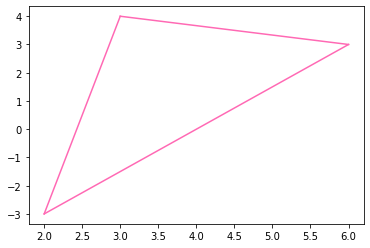

In [12]:
plot_polygon(D4, 'hotpink')

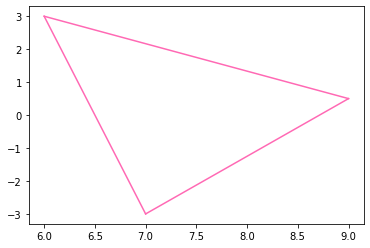

In [13]:
plot_polygon(D5, 'hotpink')

## Point 3 <a class="anchor" id="p3"> 

The purpose of this point is to implement the triangulation procedure, and to apply it to each y-monotone polygon resulting from the previous point. The answer will be given in terms of doubly-connected edge lists, and the results will be plotted.

### Definition of the algorithm

In order to triangulate a y-monotone polygon, the following functions are defined: 
- `create_chains`: This function sorts the verticies according to the y-coordinate, and divides them into two lists, corresponding to the left and right chain. It returns these two lists.  
- `is_inside`: This function determines if the diagonal given is inside the polygon. It calculates the middle point of the diagonal, and draws a horizontal line going to the right of this middle point. It checks all the edges of the polygon. In case this horizontal line intersects just once an edge, the diagonal is inside the polygon, otherwise, it is not inside. 

In [14]:
def create_chains(D):
    left = []
    right = []
    D[0].sort(key=lambda v:[v.y, v.x], reverse=True)
    start = D[0][0]
    end = D[0][len(D[0])-1]
    
    left.append(start)
    right.append(start)
    
    if start.edges[0].twin.origin.x < start.x:
        left_point = start.edges[0].twin.origin
        right_point = start.edges[1].twin.origin
        left.append(left_point)
        right.append(right_point)
    else:
        left_point = start.edges[1].twin.origin
        right_point = start.edges[0].twin.origin
        left.append(left_point)
        right.append(right_point)
        
    while (left_point != end):
        left_point = left_point.edges[0].twin.origin
        left.append(left_point)
    
    while (right_point != end):
        right_point = right_point.edges[0].twin.origin
        right.append(right_point)
    
    return left, right

def angle3(v1, v2, v3):
    det = ((v2.x - v1.x)*(v3.y - v1.y)) - ((v3.x - v1.x)*(v2.y - v1.y))
    den = (v2.x - v1.x)*(v3.x-v1.x) + (v2.y - v1.y)*(v3.y - v1.y)
    ang = np.arctan(det/den)
    if ang > 0:
        return ang
    else:
        return ang + 2*np.pi  
    
def is_inside(u1, u2, D):
    edges = []
    for i in range(len(D[1])):
        if i%2 == 0:
            edges.append(D[1][i])
    
    m = [(u1.x+u2.x)/2, (u1.y+u2.y)/2] # Middle point of the diagonal
    intersections = 0
    p1 = m
    p2 = [m[0]+100, m[1]]
    for e in edges:
        p3 = [e.origin.x, e.origin.y]
        p4 = [e.twin.origin.x, e.twin.origin.y]
        if intersect(p1,p2,p3,p4) != None:
            intersections += 1
    if intersections == 0 or intersections == 2:
        return False
    else: 
        return True

Now, the function `triangulate_monotone_polygon` is defined. This function receives the y-monotone polygon $P$, and the simple polygon that contains it, $D$. In the first place, it checks if the polygon $P$ has more than 3 vertices, because in case it has only 3, it is already triangulated. Then, it merges the left and right chains of points, and sorts the vertices according to the y-coordinate ($u_1, u_2, ..., u_n$). The first and second vertices are added to the stack $S$. 

Then, for $j$ from 3 to $n-1$, it checks if $u_j$ and the vertex on top on the stack are on different chains. In this case, it creates a diagonal from the vertex $u_j$ to all the other vertices on the opposite chain. Otherwise, while the diagonal between the vertex $u_j$ and all the other vertices in the stack, it creates a diagonal between this vertices. 

In other words, the algorithm creates diagonals whenever it is possible. 

In [15]:
def triangulate_monotone_polygon(P, D):
    S = []
    if len(P[0]) > 3:
        left, right = create_chains(P)
        U = P[0]
        S.append(U[0])
        S.append(U[1])
        for j in range(2, len(U)-1):
            uj = U[j]
            if (uj in left and S[-1] in right) or (uj in right and S[-1] in left):
                while len(S)>0:
                    u = S.pop()
                    if len(S) != 0:
                        h1, h2 = create_diagonal(uj, u)
                        P[1].append(h1)
                        P[1].append(h2)
                        D[1].append(h1)
                        D[1].append(h2)
                S.append(U[j-1])
                S.append(uj)
            else:
                u = S.pop()
                while (len(S)>0) and (is_inside(uj, S[-1], P)):
                    u = S.pop()
                    h1, h2 = create_diagonal(uj, u)
                    P[1].append(h1)
                    P[1].append(h2)
                    D[1].append(h1)
                    D[1].append(h2)
                S.append(u)
                S.append(uj)
        S.pop()
        un = U[-1]
        while len(S)>1:
            u = S.pop()
            if is_inside(un, u, P):
                h1, h2 = create_diagonal(un, u) 
                P[1].append(h1)
                P[1].append(h2)
                D[1].append(h1)
                D[1].append(h2)

### Implementation of the algorithm 

Lets implement the algorithm of triangulation for each y-monotone polygon defined in the previous point. After that, we define the attribute next and previous for all the new edges added, as well as redefine the faces of the polygon.

In [16]:
D_triangulated = D_monotone
for pol in monotone_polygons:
    triangulate_monotone_polygon(pol, D_triangulated)
defining_next(D_triangulated)
defining_faces(D_triangulated)

We can visualize each y-monotone polygon once it is triangulated. 

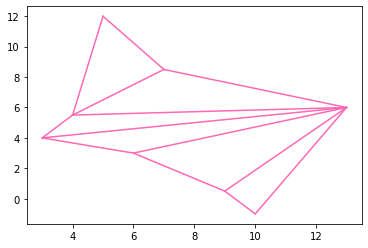

In [17]:
plot_polygon(D2, 'hotpink')

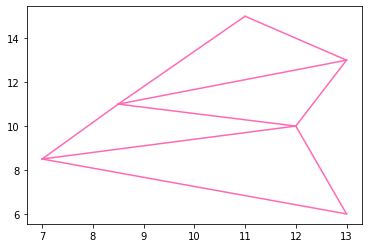

In [18]:
plot_polygon(D3, 'hotpink')

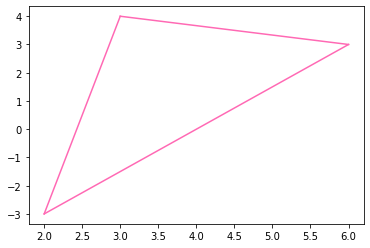

In [19]:
plot_polygon(D4, 'hotpink')

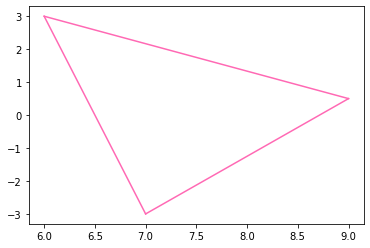

In [20]:
plot_polygon(D5, 'hotpink')

And the whole polygon triangulated looks like follows:

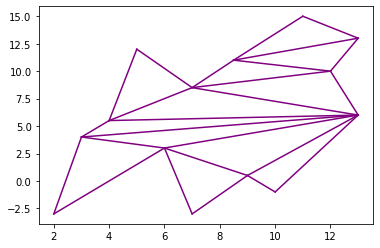

In [21]:
plot_polygon(D_triangulated, 'purple')

## Point 4 <a class="anchor" id="p4">
    
This point aims to find the vertices from which a minimum number of cameras could be used to guard the entire polygon. The results are going to be plotted. 

### Definition of the algorithm 

In order to create an algorithm that determines the minimum number of cameras that can be used to guard the entire polygon, the following functions are created: 
- `plot_coloring`: This function plots the polygon with its 3-coloration.
- `three_coloring`: This function generates the 3-coloration of the polygon. This coloration is created by creating a list of uncolored vertices. Then, the vertex with more adjacent edges is selected, colored, and its adjacent vertices are colored with different colors, checking all the adjacent vertices of each vertex. This process is repeated until all the vertices are colored. 
- `placing_cameras`: This function determines which color is less used in the 3-coloration, and places cameras at the vertices with this color. 
- `drawing_cameras`: This function plots the triangulated polygon and indicates where the cameras are placed. 

In [22]:
def plot_coloring(D):
    plot_polygon(D, 'gainsboro')
    for v in D[0]:
        if v.color == None:
            plt.scatter(v.x, v.y, c='red', marker='o')
        else:
            plt.scatter(v.x, v.y, c=v.color, marker='o')
            
def three_coloring(D):
    c = ['lime', 'aqua', 'magenta']
    
    uncolored = []
    for v in D[0]:
        if v.color == None:
            uncolored.append(v)
            
    while len(uncolored) > 0:
        # Defining the vertex that is not colored, with more adjacent edges 
        cant_edges = [len(v.edges) for v in uncolored]
        idx = cant_edges.index(max(cant_edges))
        v = uncolored[idx]
        v_colors = []
        
        # Coloring this vertex 
        for e in v.edges:
            v_colors.append(e.twin.origin.color)
        if (c[0] not in v_colors) and (v.color == None):
            v.color = c[0]
        elif (c[1] not in v_colors) and (v.color == None):
            v.color = c[1]
        elif (c[2] not in v_colors) and (v.color == None):
            v.color = c[2]
        uncolored.remove(v)
        
        # Coloring the adjacent vertices 
        for f in v.edges:
            u = f.twin.origin
            u_colors = []
            for k in u.edges:
                u_colors.append(k.twin.origin.color)
            if (c[0] not in u_colors) and (u.color == None):
                u.color = c[0]
                uncolored.remove(u)
            elif (c[1] not in u_colors) and (u.color == None):
                u.color = c[1]
                uncolored.remove(u)
            elif (c[2] not in u_colors) and (u.color == None):
                u.color = c[2]
                uncolored.remove(u)

def placing_cameras(D):
    c1, c2, c3 = 0, 0, 0
    colors = ['lime', 'aqua', 'magenta']
    for v in D[0]:
        if v.color == colors[0]:
            c1 += 1
        elif v.color == colors[1]:
            c2 += 1
        elif v.color == colors[2]:
            c3 += 1
            
    count = min(c1, c2, c3)
    if count == c1:
        col = colors[0]
    elif count == c2:
        col = colors[1]
    elif count == c3:
        col = colors[2]
    
    cameras = []
    for v in D[0]:
        if v.color == col:
            cameras.append(v)
    
    return cameras

def drawing_cameras(D):
    plot_polygon(D, 'silver')
    cameras = placing_cameras(D)
    for c in cameras:
        plt.scatter(c.x, c.y, c='deepskyblue', marker='s')

def drawing_cameras2(D, v):
    plot_polygon(D, 'silver')
    plt.scatter(v.x, v.y, c='deepskyblue', marker='s')

### Implementation of the algorithm 

First, lets visualize the 3-coloration of the triangulated polygon.

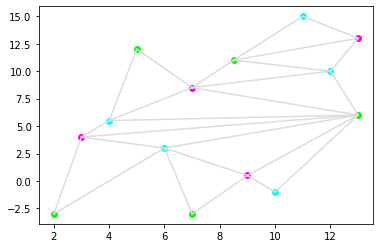

In [23]:
three_coloring(D_triangulated)
plot_coloring(D_triangulated)

Therefore, taking into account this 3-coloration, the cameras are placed in the following vertices:

Cameras placed at vertices:  [(7.0,8.5), (3.0,4.0), (9.0,0.5), (13.0,13.0)]


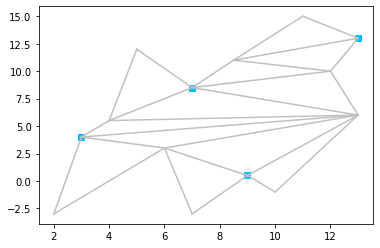

In [24]:
print('Cameras placed at vertices: ', placing_cameras(D_triangulated))
drawing_cameras(D_triangulated)

However, it could also be possible to place a camera just in the vertex (7.0,8.5), and the entire polygon would be guarded. 

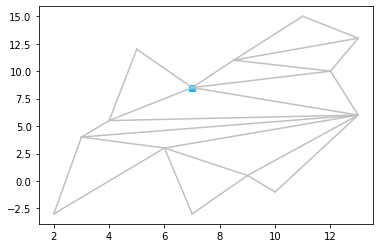

In [25]:
drawing_cameras2(D_triangulated, D[0][2])

## References <a class="anchor" id="ref">
    
- Computational Geometry - Algorithms and Applications, 3rd Ed
- https://gist.github.com/anku255/94c11a4dae33a3483536eab435177782
- http://homepages.math.uic.edu/~jan/mcs481/partitioning.pdf
- https://cs.gmu.edu/~jmlien/teaching/cs499-GC/uploads/Main/note03.pdf
- https://www.youtube.com/watch?v=fMh42fsIf0Q
- http://homepages.math.uic.edu/~jan/mcs481/triangulating.pdf